In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
segment = gpd.read_file('segments_geometry.geojson')
segment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   segment_id  792 non-null    object  
 1   road_name   792 non-null    object  
 2   geometry    792 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 18.7+ KB


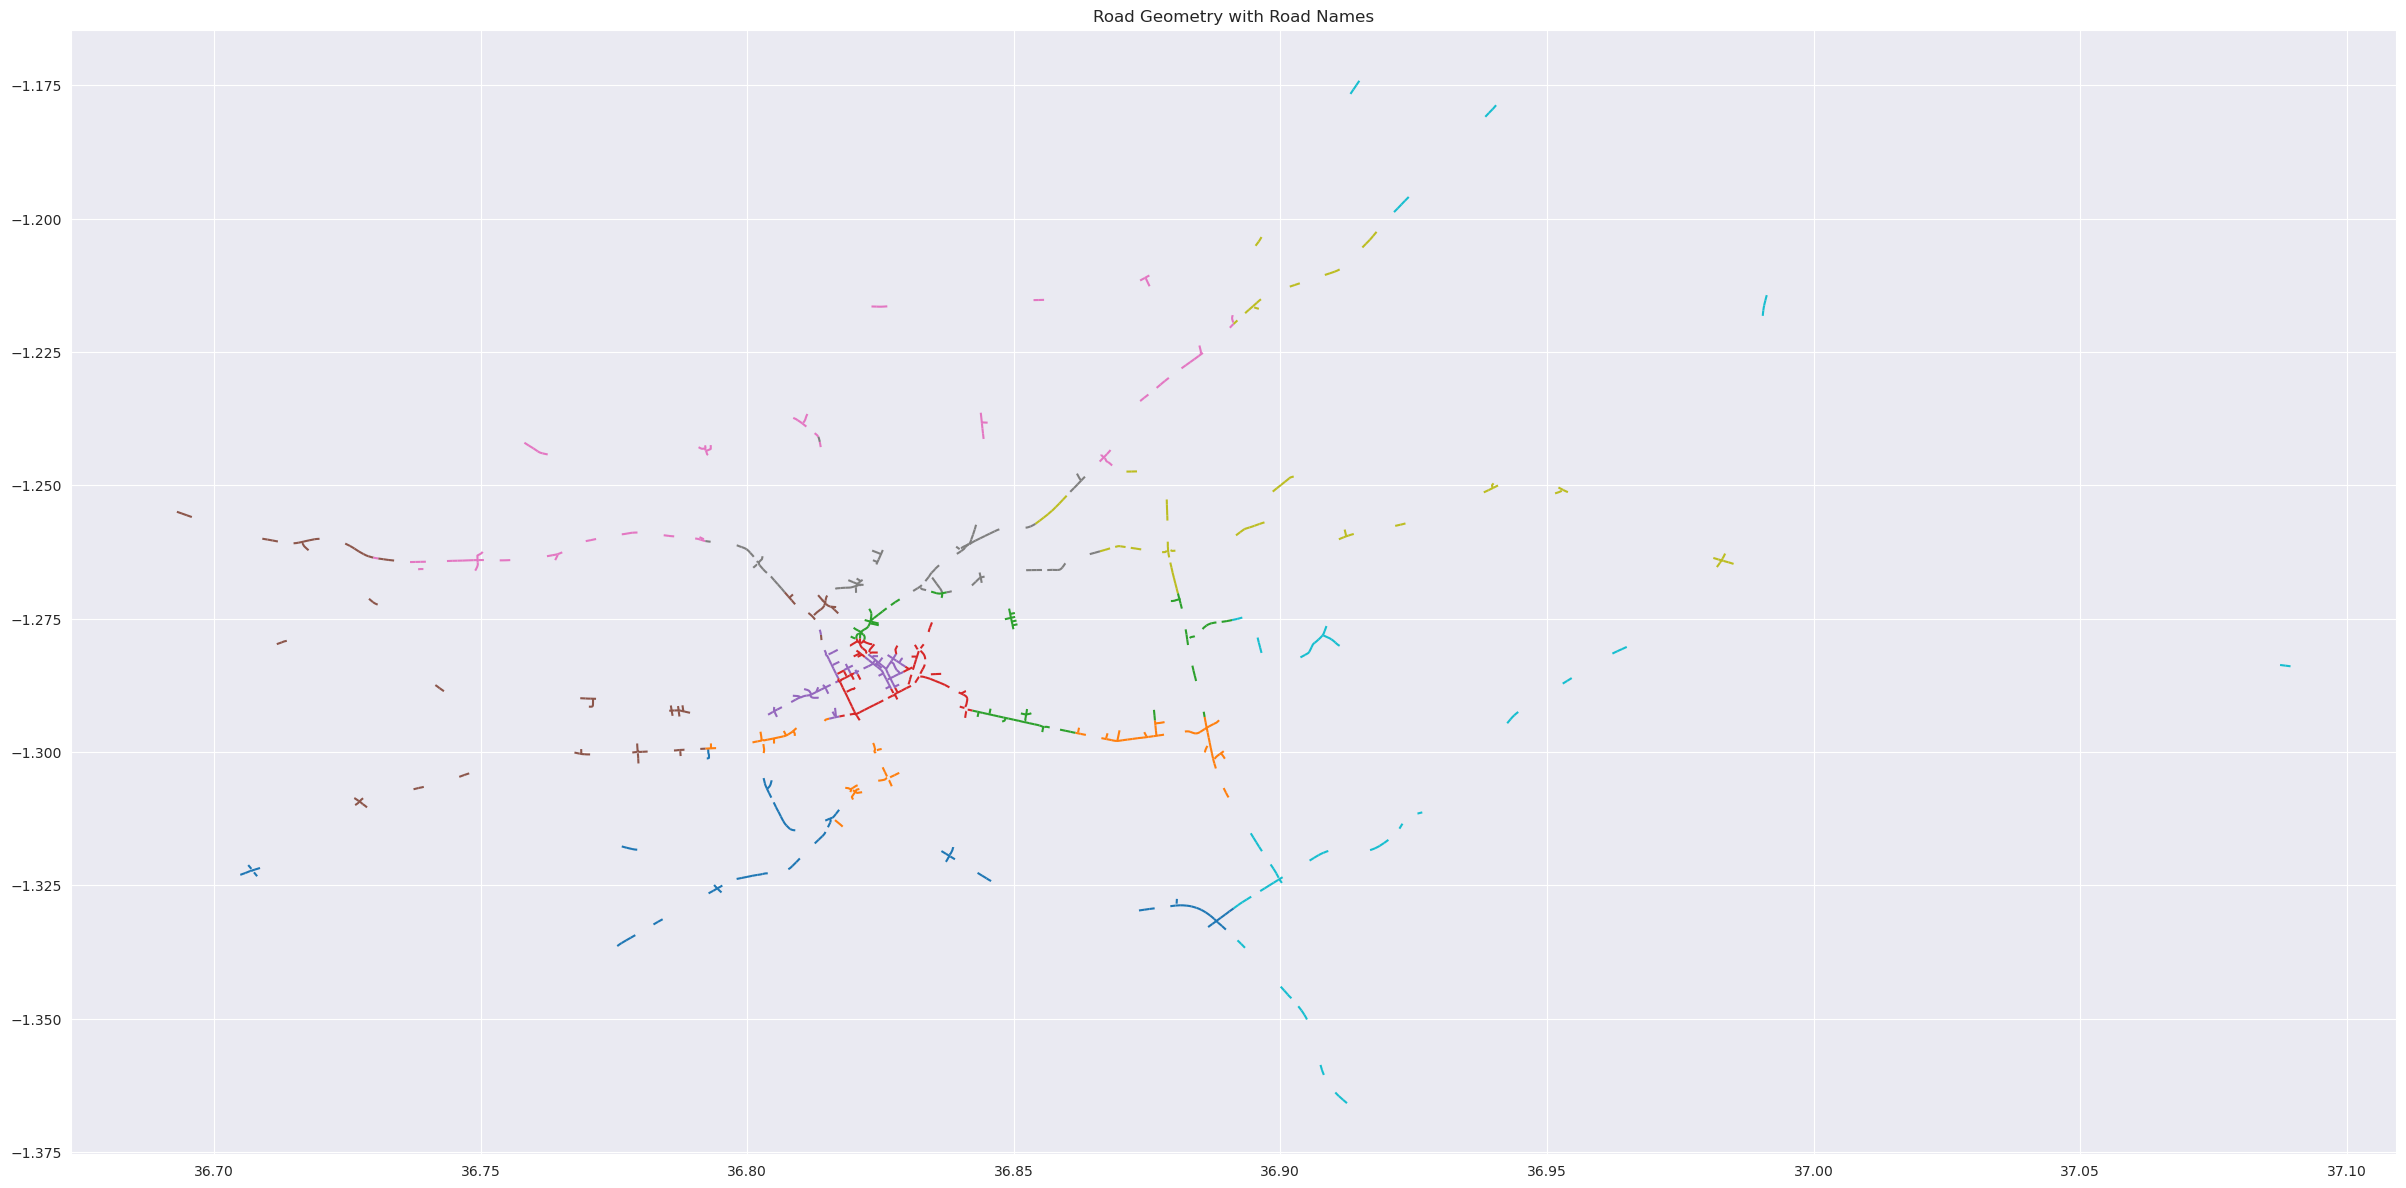

In [3]:
fig, ax = plt.subplots(figsize=(30,30))
segment.plot(column='geometry', legend=False, ax=ax)
plt.title("Road Geometry with Road Names")
plt.show()

In [4]:
train_data = pd.read_csv('Train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        6318 non-null   int64  
 1   datetime   6318 non-null   object 
 2   latitude   6318 non-null   float64
 3   longitude  6318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 197.6+ KB


In [5]:
weather_info = pd.read_csv('Weather_Nairobi_Daily_GFS.csv')
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  731 non-null    object 
 1   precipitable_water_entire_atmosphere  728 non-null    float64
 2   relative_humidity_2m_above_ground     728 non-null    float64
 3   specific_humidity_2m_above_ground     728 non-null    float64
 4   temperature_2m_above_ground           728 non-null    float64
 5   u_component_of_wind_10m_above_ground  728 non-null    float64
 6   v_component_of_wind_10m_above_ground  728 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [6]:
segment_info = pd.read_csv('Segment_info.csv')
segment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Columns: 228 entries, segment_id to 80_97_61_39_16
dtypes: float64(27), int64(200), object(1)
memory usage: 2.7+ MB


In [7]:
segment_info.columns

Index(['segment_id', 'side', '25_48', '79_76', '79_65', '79_39', '28_78_50',
       '55_90', '26_76', '92_30',
       ...
       '80_97_61_65_11', '80_97_61_65_12', '80_97_61_65_15', '80_97_61_65_16',
       '80_97_61_39_0', '80_97_61_39_10', '80_97_61_39_11', '80_97_61_39_12',
       '80_97_61_39_15', '80_97_61_39_16'],
      dtype='object', length=228)

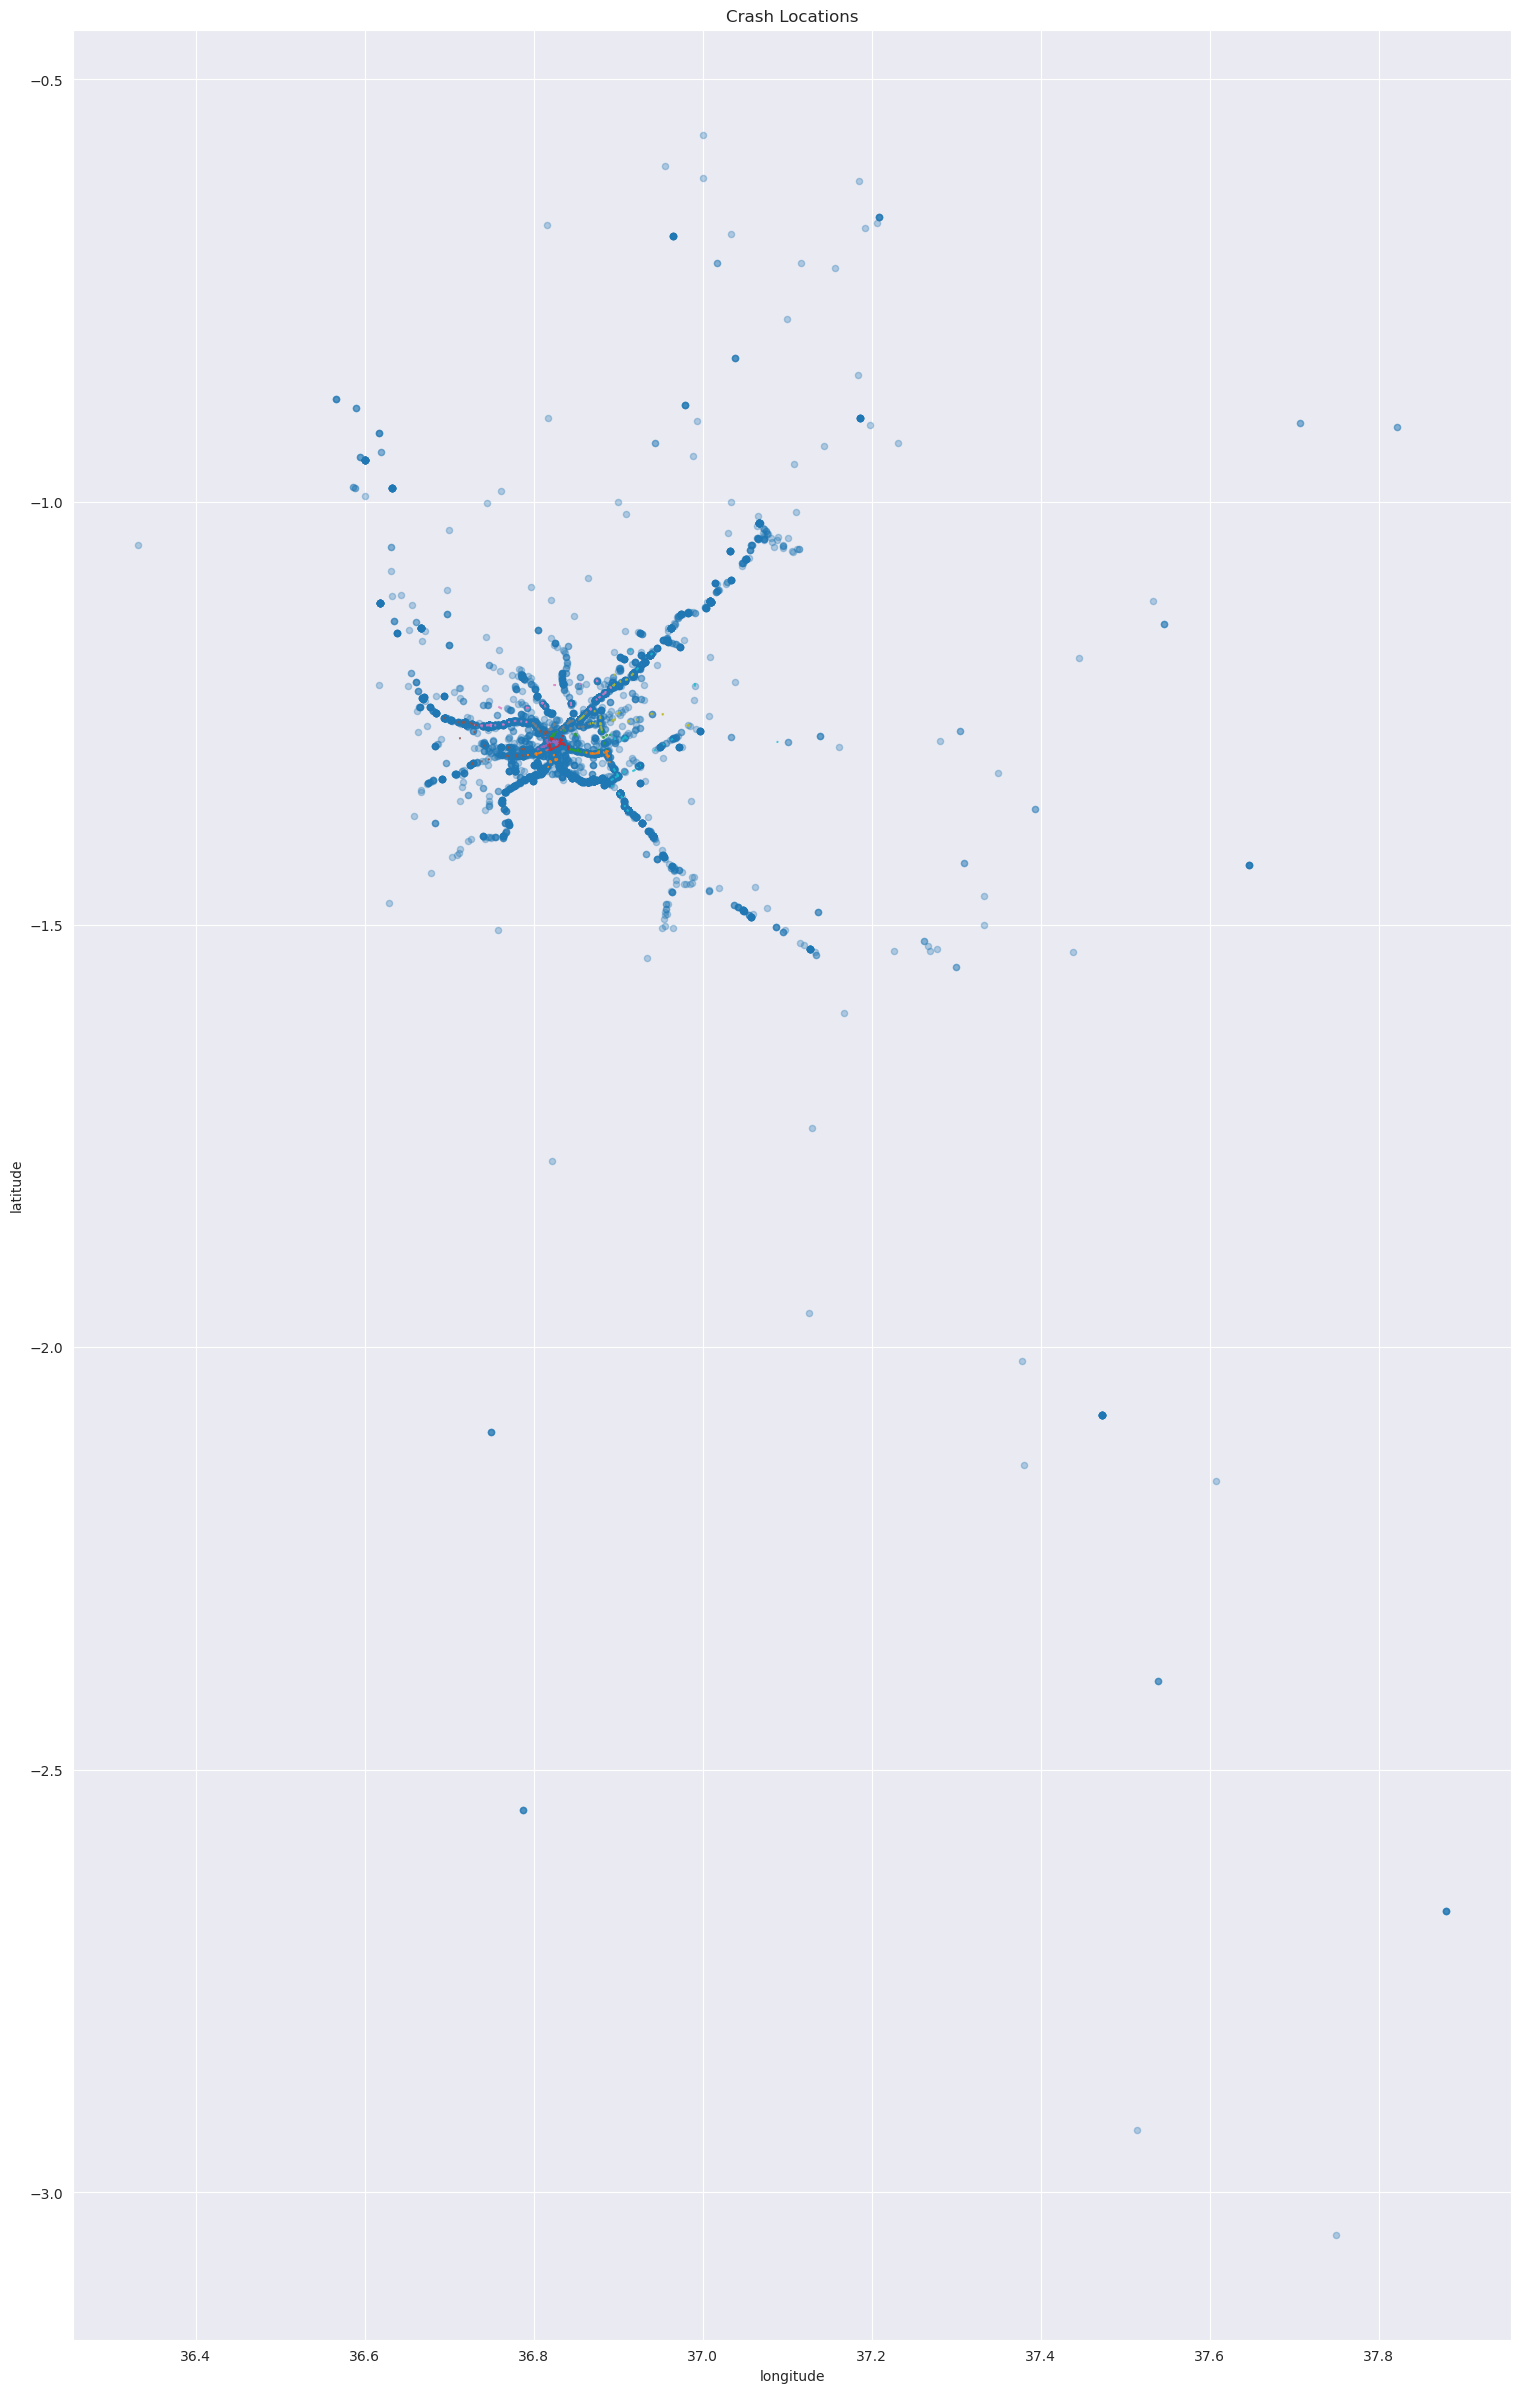

In [8]:
ax = segment.plot(column='geometry',legend=False,figsize=(30,30))
train_data.plot(x='longitude', y='latitude', kind='scatter',alpha = 0.3, title='Crash Locations',ax = ax)
plt.show()

In [9]:
weather_info.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


In [10]:
segment

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [12]:
segment.to_crs('epsg:4326')

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [13]:
train_data

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518


In [ ]:
training_data = train_data.drop(columns=['uid','datetime'])

In [ ]:
import tensorflow as tf
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2),  # Output layer with 2 units since input data has 2 features (longitude, latitude)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the neural network
model.fit(training_data['longitude'],training_data['latitude'], epochs=1000, batch_size=50, verbose=0)

# Extract features from intermediate layers
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.layers[2].output)
features = intermediate_layer_model.predict(X)

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=2.5)
clusters = cluster.fit_predict(features)

# Visualize the hierarchical clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Neural Network Features for Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Use Agglomerative clustering to model the data

In [121]:
import tensorflow as tf
from sklearn.cluster import AgglomerativeClustering

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer with 2 units for latitude and longitude
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the neural network
model.fit(training_data,training_data, epochs=500, batch_size=16, verbose=0)

# Extract features from intermediate layers
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.layers[4].output)
features = intermediate_layer_model.predict(training_data)
features

198/198 [==============================] - 1s 2ms/step


array([[ 0.      ,  0.      ,  0.      , ...,  0.      , 20.08998 ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 19.605383,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 19.605383,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 20.196735,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 20.14043 ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , 20.105309,
         0.      ]], dtype=float32)

In [153]:

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None,distance_threshold=0.75, metric='euclidean')
clusters = cluster.fit_predict(features)

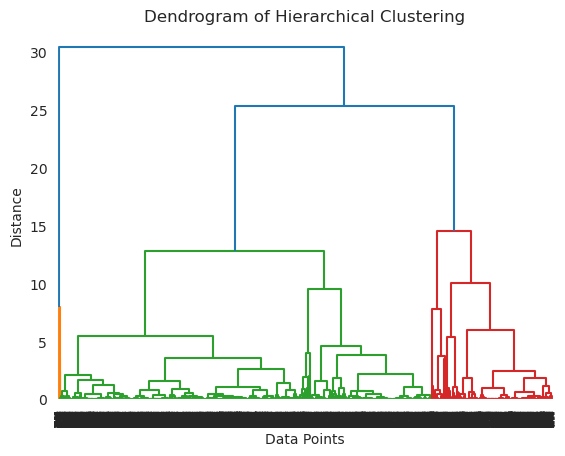

In [100]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = sch.linkage(features, method='ward')

# Plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


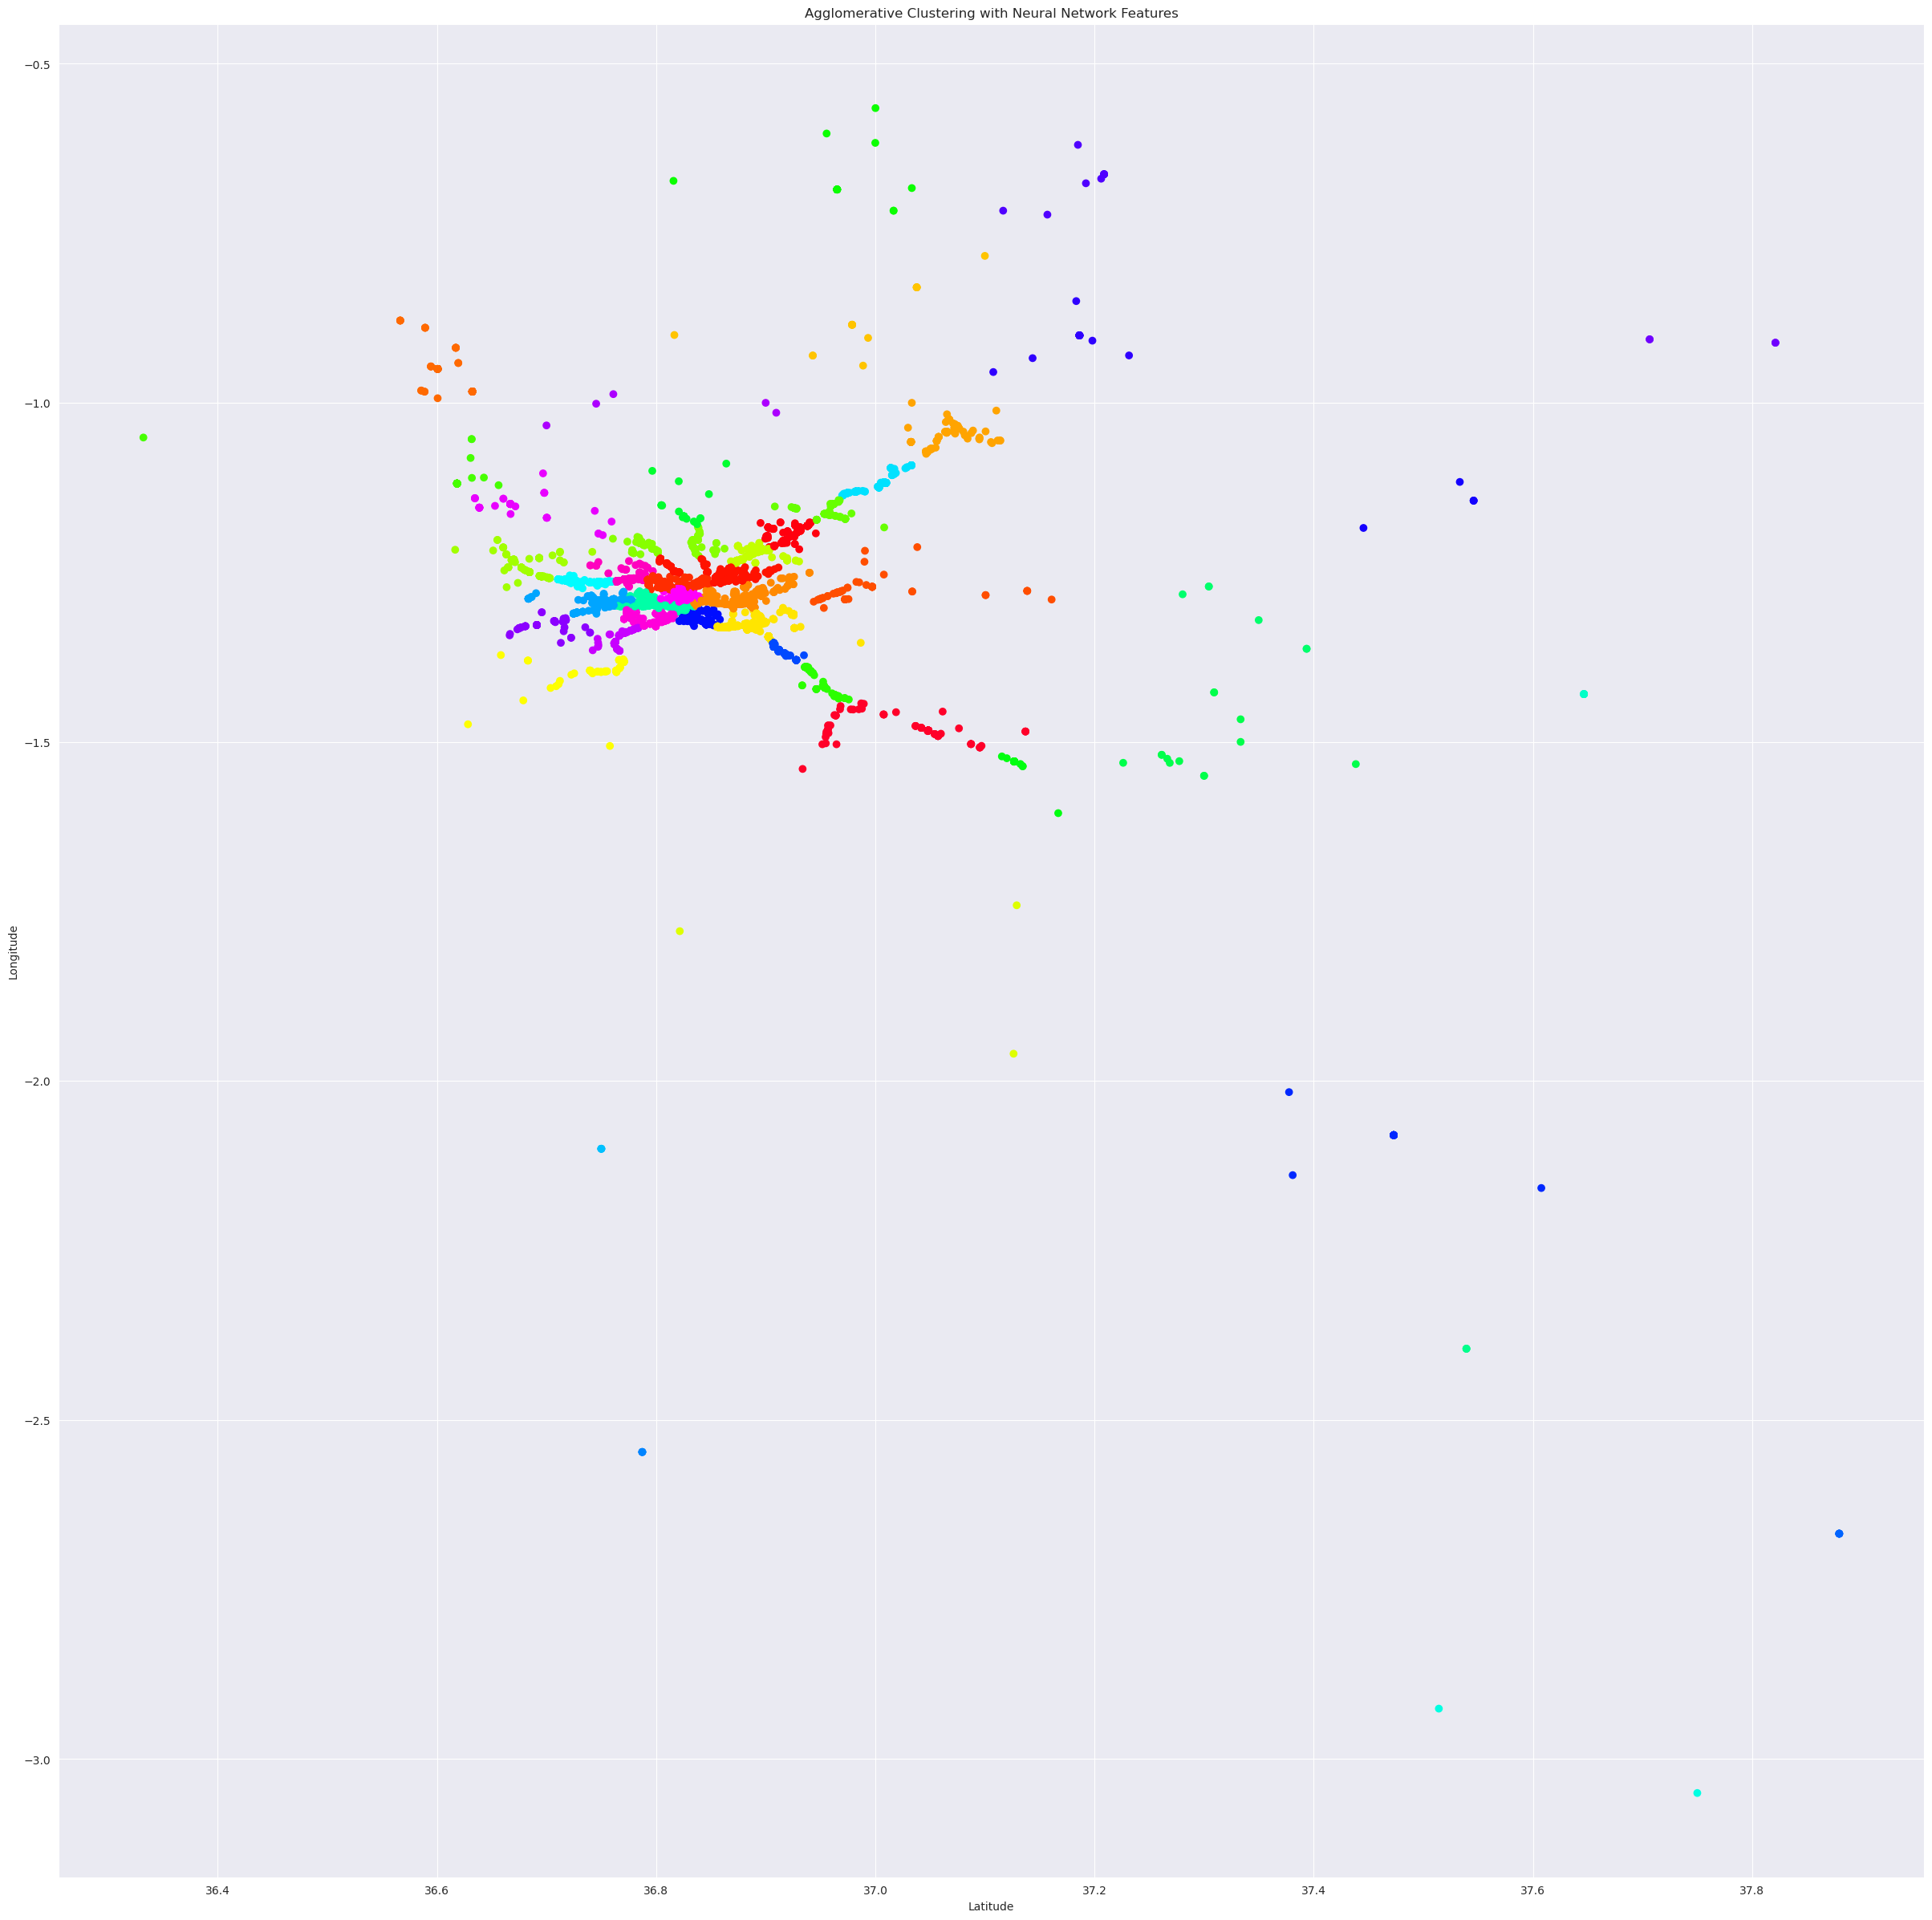

In [156]:
plt.figure(figsize=(30,30))
plt.scatter(training_data['longitude'], training_data['latitude'], c=clusters, cmap='gist_rainbow')
plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [109]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assume 'model' is your trained neural network model
# Assume 'scaler' is the scaler used during training

def predict_clusters(model, scaler, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Extract features from intermediate layers
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                              outputs=model.layers[1].output)
    features = intermediate_layer_model.predict(new_data_scaled)

    # Apply hierarchical clustering
    cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.0)
    clusters = cluster.fit_predict(features)

    return clusters

# Example usage:
new_data = np.array([
    [37.0, -1.0],
    [38.0, 0.0],
    [37.5, -0.5],
    [36.5, -1.5]
])

# Make predictions on new data
predicted_clusters = predict_clusters(model, scaler, new_data)

# Print the predicted clusters
print("Predicted Clusters:", predicted_clusters)


1/1 [==============================] - 0s 79ms/step
Predicted Clusters: [3 2 1 0]


QhullError: QH6421 qhull internal error (qh_maxsimplex): qh.MAXwidth required for qh_maxsimplex.  Used to estimate determinate

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1404357205  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  0  Error-roundoff 2.6e-14  _one-merge 1.3e-13
  _near-inside 6.6e-13  Visible-distance 5.2e-14  U-max-coplanar 5.2e-14
  Width-outside 1e-13  _wide-facet 3.1e-13  _maxoutside 1.6e-13

A Qhull internal error has occurred.  Please send the input and output to
qhull_bug@qhull.org. If you can duplicate the error with logging ('T4z'), please
include the log file.


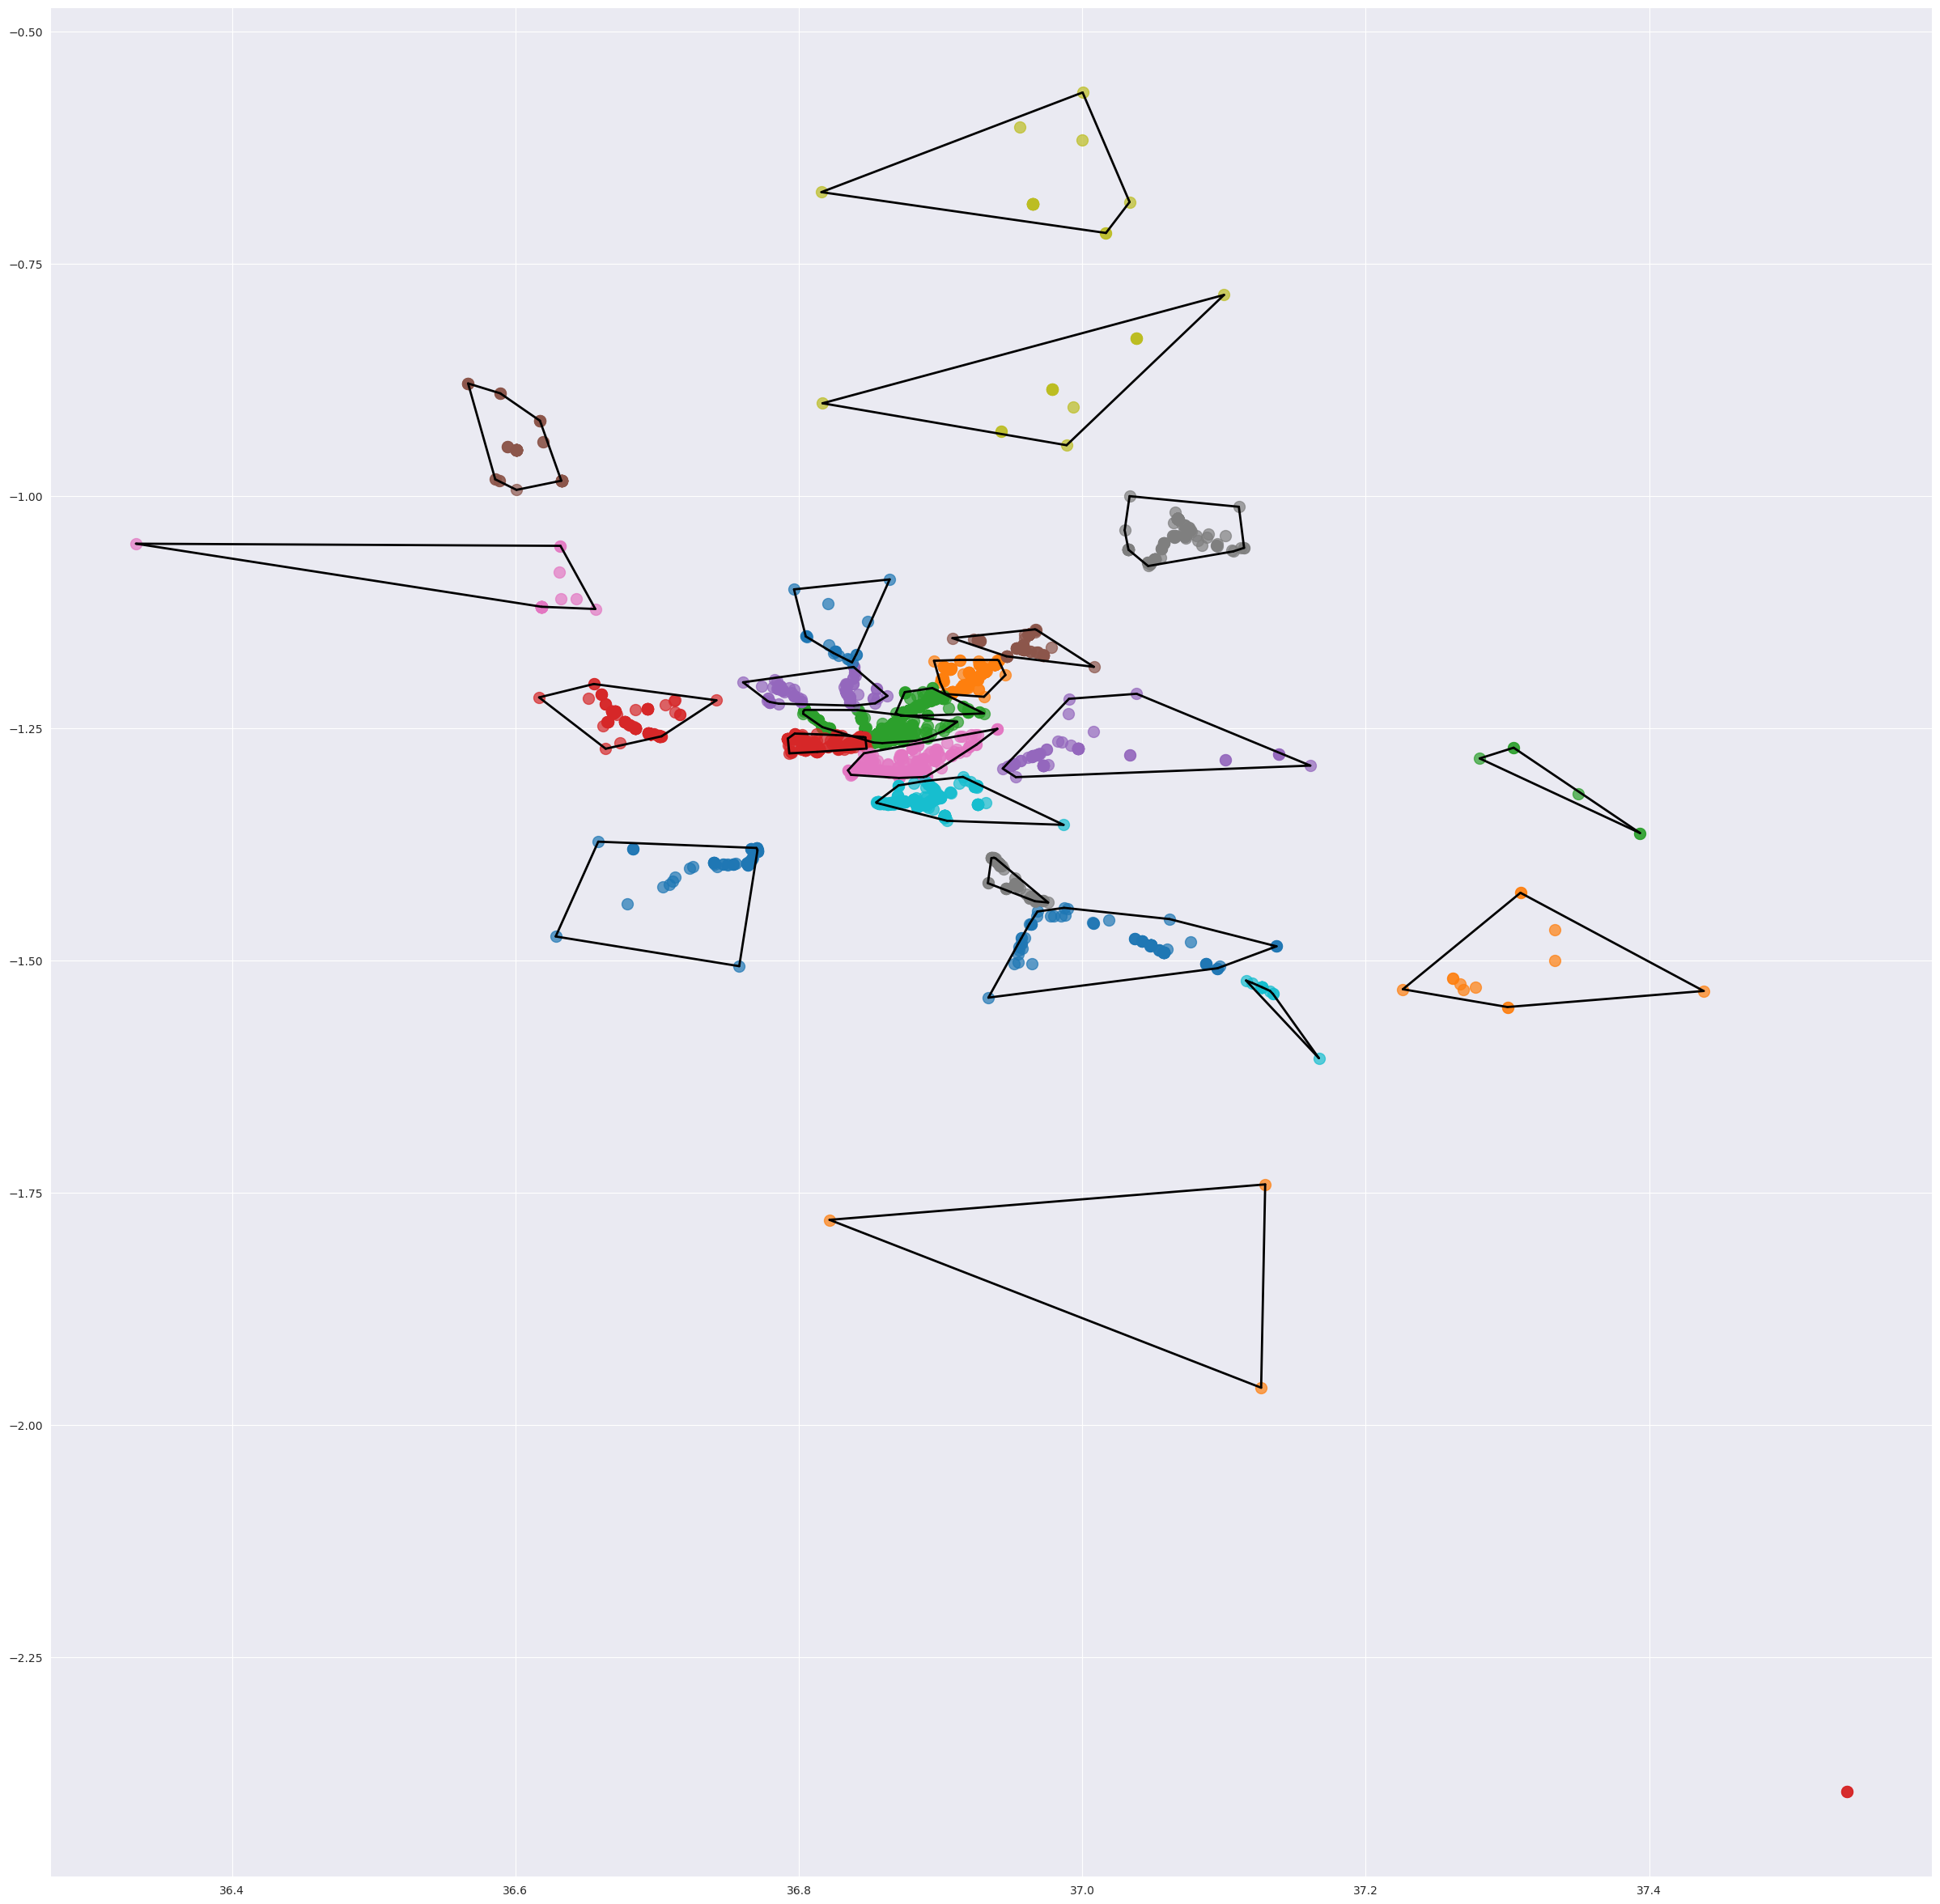

In [155]:
from scipy.spatial import ConvexHull
# Visualize the hierarchical clusters with scatter plot and convex hulls
plt.figure(figsize=(30, 30))

for cluster_label in set(clusters):
    cluster_points = training_data.loc[clusters == cluster_label]
    plt.scatter(
        cluster_points['longitude'],
        cluster_points['latitude'],
        label=f'Cluster {cluster_label + 1}',
        alpha=0.7,
        s=100  # Adjust the point size here
    )

    # Outline clusters with convex hulls
    hull = ConvexHull(cluster_points[['longitude', 'latitude']])
    for simplex in hull.simplices:
        plt.plot(cluster_points['longitude'].values[simplex], cluster_points['latitude'].values[simplex], 'k-', linewidth=2)

plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

